In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib import rc 
from matplotlib.animation import FuncAnimation as animate 
rc('animation',html='html5')

In [2]:
dataset = pd.read_csv('spirals.csv')
dataset.head(3)

,x,y,color
0,125.322566,386.764772,1
1,307.117266,337.307489,2
2,246.744149,275.732338,1


In [3]:
length=150
X = dataset[['x','y']][:length].to_numpy() 
Y = dataset['color'][:length].to_numpy()
X.shape,Y.shape
 

((150, 2), (150,))

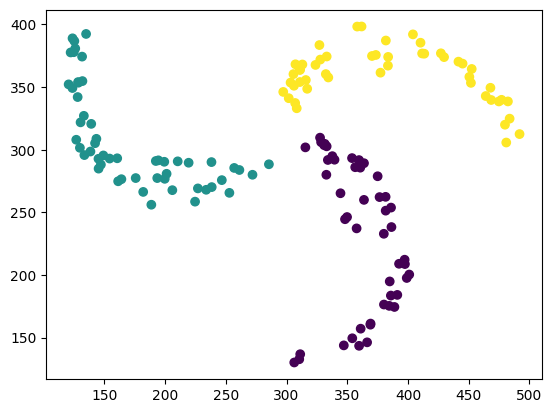

In [4]:
plt.scatter(X[:,0],X[:,1],
         c=Y)

The number of classes and the dimensions of the input vector as you can see is 3 and 2 respectively.
```
ndim = 2 
num_classes = 3
``` 

In [5]:
# initializing the weights
w = np.random.rand(2,3)
w,w.shape

(array([[0.76103109, 0.26254883, 0.9807862 ],
        [0.83776192, 0.02888388, 0.38797035]]),
 (2, 3))

In [6]:
X = X/X.max()
X.shape

(150, 2)

In [17]:
def softmax(x):
    expS = np.exp(x) # [[exp(s1) exp(s2) exp(s3)]]
    sum_expS = np.sum(expS,axis=1,keepdims=True) # exp(s1) + exp(s2) + exp(s3)
    return expS/sum_expS



In [19]:
softmax(s)[range(length),Y]

array([0.2110884 , 0.37230137, 0.2094559 , 0.42915557, 0.41812132,
       0.42865205, 0.20545818, 0.21947954, 0.37207966, 0.433139  ,
       0.22558458, 0.21219238, 0.21689464, 0.22381722, 0.37516699,
       0.22756259, 0.39551496, 0.42112626, 0.22740194, 0.36971099,
       0.22213074, 0.21998143, 0.21217655, 0.21364772, 0.38940985,
       0.22758073, 0.4063621 , 0.40427357, 0.42041258, 0.41644001,
       0.38232796, 0.21361623, 0.39945266, 0.37129046, 0.38511814,
       0.40243119, 0.22866297, 0.3988148 , 0.39926128, 0.43278309,
       0.43005218, 0.22377776, 0.21736706, 0.42925968, 0.38396959,
       0.4341485 , 0.42579886, 0.22390689, 0.3719662 , 0.42578315,
       0.21741319, 0.40238453, 0.42770026, 0.40416986, 0.21093311,
       0.37230685, 0.41883212, 0.3697238 , 0.40633233, 0.22223494,
       0.37074533, 0.39180345, 0.42121085, 0.21227623, 0.38600006,
       0.22498686, 0.38868254, 0.37430715, 0.37029333, 0.37494528,
       0.43182695, 0.39676301, 0.22881445, 0.42762635, 0.40403

In [9]:
for i in range(200):
    s = np.dot(X,w)
    probs = softmax(s)
    correct_log_probs = -np.log(probs[range(length),Y])
    total_loss = correct_log_probs.sum()/length 
    dscores = (probs[range(length),Y]-1 )/length 
    dw = np.dot(X.T,dscores)
    print(dw.shape)
    w -= 0.001*dw 
    if i % 10 == 0:   
        print(f"iteration {i}: loss {total_loss}")

(2,)


ValueError: operands could not be broadcast together with shapes (2,3) (2,) (2,3) 

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) 
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())